# Determing CpG ratio per Gene Function

# Step 1: Obtain GO slim information (gene function)

In [6]:
!head -2 ../data-results/Geoduck-transcriptome-v2-GO-SlimUnique.csv

Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,SPID,GOID,GO_id,term,GOSlim_bin,aspect,contig
comp95_c0_seq1,sp,Q8K358,PIGU_MOUSE,67.53,77,25,0,231,1,258,334,7.00E-32,119,Q8K358,GO:0006506,GO:0006506,GPI anchor biosynthetic process,protein metabolism,P,95


In [3]:
!date

Fri Nov 13 07:18:28 PST 2015


In [7]:
!wc -l ../data-results/Geoduck-transcriptome-v2-GO-SlimUnique.csv

   19652 ../data-results/Geoduck-transcriptome-v2-GO-SlimUnique.csv


In [9]:
!head analyses/Geoduck-v2-GOslim_only

ContigID	GOSlim_bin
comp95_c0_seq1	protein metabolism
comp146_c0_seq1	RNA metabolism
comp195_c0_seq1	stress response
comp296_c0_seq1	DNA metabolism
comp434_c0_seq1	cell cycle and proliferation
comp455_c1_seq1	other metabolic processes
comp943_c0_seq1	other metabolic processes
comp945_c0_seq1	cell adhesion
comp1059_c0_seq1	protein metabolism


In [10]:
!wc -l analyses/Geoduck-v2-GOslim_only

   19652 analyses/Geoduck-v2-GOslim_only


# Step 2: Determine CpG ratio for each gene 

# Step 2a: Convert fasta to tab-delimited

In [13]:
!head ../data-results/Geoduck-transcriptome-v2.fasta

>comp7_c0_seq1 len=210 path=[5082:0-45 293:46-209]
TTAACCAAGGTGTGACGCCGACGCAAGGGTGAGTAGAATAGCTCTGTTTATTATCCGAAT
AGTCGAGCTAAAAACACAAAGAATAAAGGTTTAACAGTTCTATCTGAAATATATATTTGG
ATATCTATTGGTAAGGATACGTTTTATATTAAAAACAAACAATTTATAAAGCGCTCTCGC
ACCTTGTTTTTGCATTATGAGCATATACAT
>comp30_c0_seq1 len=201 path=[6331:0-200]
AAGAAAATTGATTTGAAATTGACTCTGCTTGAATAGAAAAAAATGTTTTGTTCTTTTTTT
CGAAGTGTAAATTGTAAATTACTTTATTAAAAAATTCATAGTTTCCGGGCAAGTTATTTT
TAATATATTGTAAATGTTGTCATTCAGAGGTTTGTTACGAATATATTGTTTGACAGACAT
GCTACTGTTGTACTACTATTG


In [19]:
!cut -d' ' -f1 ../data-results/Geoduck-transcriptome-v2.fasta > analyses/Geoduck-transcriptome-v2_IDonly.fasta
!head analyses/Geoduck-transcriptome-v2_IDonly.fasta

>comp7_c0_seq1
TTAACCAAGGTGTGACGCCGACGCAAGGGTGAGTAGAATAGCTCTGTTTATTATCCGAAT
AGTCGAGCTAAAAACACAAAGAATAAAGGTTTAACAGTTCTATCTGAAATATATATTTGG
ATATCTATTGGTAAGGATACGTTTTATATTAAAAACAAACAATTTATAAAGCGCTCTCGC
ACCTTGTTTTTGCATTATGAGCATATACAT
>comp30_c0_seq1
AAGAAAATTGATTTGAAATTGACTCTGCTTGAATAGAAAAAAATGTTTTGTTCTTTTTTT
CGAAGTGTAAATTGTAAATTACTTTATTAAAAAATTCATAGTTTCCGGGCAAGTTATTTT
TAATATATTGTAAATGTTGTCATTCAGAGGTTTGTTACGAATATATTGTTTGACAGACAT
GCTACTGTTGTACTACTATTG


In [20]:
!perl -e '$count=0; $len=0; while(<>) {s/\r?\n//; s/\t/ /g; if (s/^>//) { if ($. != 1) {print "\n"} s/ |$/\t/; $count++; $_ .= "\t";} else {s/ //g; $len += length($_)} print $_;} print "\n"; warn "\nConverted $count FASTA records in $. lines to tabular format\nTotal sequence length: $len\n\n";' \
analyses/Geoduck-transcriptome-v2_IDonly.fasta > analyses/Geoduck-transcriptome-v2.tab


Converted 154407 FASTA records in 1926166 lines to tabular format
Total sequence length: 101836734



In [21]:
!head -1 analyses/Geoduck-transcriptome-v2.tab

comp7_c0_seq1		TTAACCAAGGTGTGACGCCGACGCAAGGGTGAGTAGAATAGCTCTGTTTATTATCCGAATAGTCGAGCTAAAAACACAAAGAATAAAGGTTTAACAGTTCTATCTGAAATATATATTTGGATATCTATTGGTAAGGATACGTTTTATATTAAAAACAAACAATTTATAAAGCGCTCTCGCACCTTGTTTTTGCATTATGAGCATATACAT


In [22]:
#add column with length of sequence
!perl -e '$col = 2;' -e 'while (<>) { s/\r?\n//; @F = split /\t/, $_; $len = length($F[$col]); print "$_\t$len\n" } warn "\nAdded column with length of column $col for $. lines.\n\n";' \
analyses/Geoduck-transcriptome-v2.tab > analyses/Geoduck-transcriptome-v2-len.tab


Added column with length of column 2 for 154407 lines.



In [23]:
!head -1 analyses/Geoduck-transcriptome-v2-len.tab

comp7_c0_seq1		TTAACCAAGGTGTGACGCCGACGCAAGGGTGAGTAGAATAGCTCTGTTTATTATCCGAATAGTCGAGCTAAAAACACAAAGAATAAAGGTTTAACAGTTCTATCTGAAATATATATTTGGATATCTATTGGTAAGGATACGTTTTATATTAAAAACAAACAATTTATAAAGCGCTCTCGCACCTTGTTTTTGCATTATGAGCATATACAT	210


In [24]:
!awk -F\CG '{print NF-1}' analyses/Geoduck-transcriptome-v2-len.tab > analyses/Geoduck-transcriptome-v2-len_CG.tab
!awk -F\C '{print NF-1}' analyses/Geoduck-transcriptome-v2-len.tab > analyses/Geoduck-transcriptome-v2-len_C.tab
!awk -F\G '{print NF-1}' analyses/Geoduck-transcriptome-v2-len.tab > analyses/Geoduck-transcriptome-v2-len_G.tab
!paste analyses/Geoduck-transcriptome-v2-len.tab \
analyses/Geoduck-transcriptome-v2-len_CG.tab \
analyses/Geoduck-transcriptome-v2-len_C.tab \
analyses/Geoduck-transcriptome-v2-len_G.tab \
> analyses/Geoduck-transcriptome-v2_C-G.tab
!head -3 analyses/Geoduck-transcriptome-v2_C-G.tab


comp7_c0_seq1		TTAACCAAGGTGTGACGCCGACGCAAGGGTGAGTAGAATAGCTCTGTTTATTATCCGAATAGTCGAGCTAAAAACACAAAGAATAAAGGTTTAACAGTTCTATCTGAAATATATATTTGGATATCTATTGGTAAGGATACGTTTTATATTAAAAACAAACAATTTATAAAGCGCTCTCGCACCTTGTTTTTGCATTATGAGCATATACAT	210	8	32	38
comp30_c0_seq1		AAGAAAATTGATTTGAAATTGACTCTGCTTGAATAGAAAAAAATGTTTTGTTCTTTTTTTCGAAGTGTAAATTGTAAATTACTTTATTAAAAAATTCATAGTTTCCGGGCAAGTTATTTTTAATATATTGTAAATGTTGTCATTCAGAGGTTTGTTACGAATATATTGTTTGACAGACATGCTACTGTTGTACTACTATTG	201	3	19	33
comp35_c0_seq1		GAAAATAAAAGTATGATGGTCACACAATGTTATCCGTTATCCAATCAAAATGTCTAATTGGAAAGAAAAACATCATTTTAACTGTAAATTTTCTATTGAACTGAAGTAGTGGGGATATATCTATCTACAAATTATGAAGATATGCGATTGAACATCTTTGCATAGCAAGAGAAATATCAGACAGCAAACAGTAAATAGATGACGTGGAA	209	3	27	37


![](http://eagle.fish.washington.edu/cnidarian/skitch/BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png)

In [26]:
!awk '{print $1, "\t", (($4)/($5*$6))*(($3**2)/($3-1))}' \
analyses/Geoduck-transcriptome-v2_C-G.tab \
> analyses/Geoduck-transcriptome-v2_CpG.tab
!head analyses/Geoduck-transcriptome-v2_CpG.tab

comp7_c0_seq1 	 1.38819
comp30_c0_seq1 	 0.966531
comp35_c0_seq1 	 0.630645
comp36_c0_seq1 	 0
comp49_c0_seq1 	 0.836969
comp59_c0_seq1 	 0.510208
comp60_c0_seq1 	 0.241512
comp65_c0_seq1 	 0.307696
comp66_c0_seq1 	 0.756371
comp69_c0_seq1 	 0.494277


# Join with GO Slim

In [12]:
!head analyses/Geoduck-v2-GOslim_only

ContigID	GOSlim_bin
comp95_c0_seq1	protein metabolism
comp146_c0_seq1	RNA metabolism
comp195_c0_seq1	stress response
comp296_c0_seq1	DNA metabolism
comp434_c0_seq1	cell cycle and proliferation
comp455_c1_seq1	other metabolic processes
comp943_c0_seq1	other metabolic processes
comp945_c0_seq1	cell adhesion
comp1059_c0_seq1	protein metabolism


In [73]:
!sed 's/ /%/g' analyses/Geoduck-v2-GOslim_only > analyses/Geoduck-v2-GOslim_only%

In [13]:
#!tr ',' "\t" <../data/Piura_v1_GOslim.csv> ../data/Piura_v1_GOslim.tab

In [74]:
!sort analyses/Geoduck-v2-GOslim_only% | tail -n +2 > analyses/Geoduck-v2-GOslim_only.sorted
#!awk -F $'\t' '{print $1, "\t", $2}' analyses/Geoduck-v2-GOslim_only.sorted > ../data/Piura_v1_GOslim.sortedtab
!head analyses/Geoduck-v2-GOslim_only.sorted

comp100097_c0_seq1	transport
comp100104_c2_seq1	protein%metabolism
comp100105_c1_seq1	RNA%metabolism
comp100108_c1_seq1	transport
comp100109_c0_seq1	other%biological%processes
comp100113_c0_seq1	other%biological%processes
comp100113_c0_seq2	protein%metabolism
comp100113_c1_seq1	protein%metabolism
comp100129_c0_seq1	other%biological%processes
comp100141_c0_seq1	other%metabolic%processes


In [15]:
!sort analyses/Geoduck-transcriptome-v2_CpG.tab > analyses/Geoduck-transcriptome-v2_CpG.sorted
#!awk -F $'\t' '{print $1, "\t", $2}' ../data/Piura_v1_CpG.sorted > ../data/Piura_v1_CpG.sortedtab
!head analyses/Geoduck-transcriptome-v2_CpG.sorted

comp100000_c0_seq1 	 0.919033
comp100001_c1_seq1 	 0.264219
comp100001_c2_seq1 	 0.233631
comp100002_c0_seq1 	 0.985872
comp100004_c1_seq1 	 0.439224
comp100007_c0_seq1 	 0.689395
comp100010_c0_seq1 	 1.1367
comp100011_c0_seq1 	 0.562483
comp100012_c0_seq1 	 0.152087
comp100014_c0_seq1 	 0.571851


In [77]:
#-a1 keeps all of column 1
!join -a1 analyses/Geoduck-transcriptome-v2_CpG.sorted \
analyses/Geoduck-v2-GOslim_only.sorted > analyses/Geoduck-transcriptome-v2_CpG-GOSlim

In [78]:
!tail -5 analyses/Geoduck-transcriptome-v2_CpG-GOSlim

comp99991_c0_seq1 0.48971
comp99995_c0_seq1 0.167899
comp99996_c0_seq1 1.30647 protein%metabolism
comp99996_c2_seq1 1.1719 protein%metabolism
comp99998_c0_seq1 0.583681


In [94]:
!tr ' ' "\t" <analyses/Geoduck-transcriptome-v2_CpG-GOSlim> analyses/Geoduck-transcriptome-v2_CpG-GOSlim.txt

In [95]:
!tail -5 analyses/Geoduck-transcriptome-v2_CpG-GOSlim.txt

comp99991_c0_seq1	0.48971
comp99995_c0_seq1	0.167899
comp99996_c0_seq1	1.30647	protein%metabolism
comp99996_c2_seq1	1.1719	protein%metabolism
comp99998_c0_seq1	0.583681


In [96]:
!awk -F $'\t' '{print $1, "\t", $2," \t", $3}' analyses/Geoduck-transcriptome-v2_CpG-GOSlim.txt \
> analyses/Geoduck-transcriptome-v2_CpG-GOSlim.tab
!tail analyses/Geoduck-transcriptome-v2_CpG-GOSlim.tab


comp99985_c0_seq1 	 0.65215  	 
comp99986_c0_seq1 	 0.646806  	 
comp99986_c2_seq1 	 0.433207  	 stress%response
comp99988_c0_seq1 	 0.700512  	 
comp99988_c0_seq2 	 0.813388  	 
comp99991_c0_seq1 	 0.48971  	 
comp99995_c0_seq1 	 0.167899  	 
comp99996_c0_seq1 	 1.30647  	 protein%metabolism
comp99996_c2_seq1 	 1.1719  	 protein%metabolism
comp99998_c0_seq1 	 0.583681  	 


In [84]:
import pandas as pd

In [97]:
CpG = pd.read_table('analyses/Geoduck-transcriptome-v2_CpG-GOSlim.tab', header=None)


In [98]:
CpG

,0,1,2
0,comp100000_c0_seq1,0.919033,
1,comp100001_c1_seq1,0.264219,
2,comp100001_c2_seq1,0.233631,
3,comp100002_c0_seq1,0.985872,
4,comp100004_c1_seq1,0.439224,
5,comp100007_c0_seq1,0.689395,
6,comp100010_c0_seq1,1.136700,
7,comp100011_c0_seq1,0.562483,
8,comp100012_c0_seq1,0.152087,
9,comp100014_c0_seq1,0.571851,


In [99]:
%matplotlib inline


In [100]:
import matplotlib.pyplot as plt 

[0.4, 0.7, 0, 15]

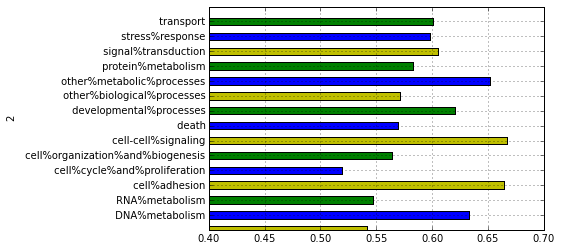

In [106]:
CpG.groupby(2)[1].mean().plot(kind='barh', color=list('ybg'))
plt.axis([0.4, 0.7, 0, 15])

[0, 1.5, 0, 1.9]

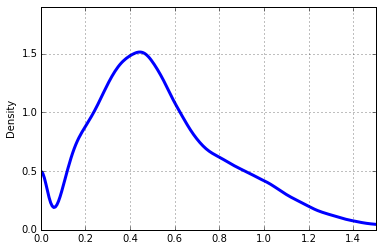

In [107]:
# pandas density plot
CpG[1].plot(kind='kde', linewidth=3);
plt.axis([0, 1.5, 0, 1.9])